# Analyzing Features 

Variáveis a serem analisadas: 
* Perdas / Ganhos

Passo-a-passo:
* Overview das features (correlação)
* Análises de Feature Importance
* Análises de Agrupamento de Váriaveis

In [1]:
from IPython.display import HTML

HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
 } else {
 $('div.input').show();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code on/off"></form>''')

In [1]:
from IPython.display import Markdown, display

import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(font_scale=1.5)

import matplotlib.pyplot as plt 
from dateutil.relativedelta import *

from sklearn import metrics

## Build Dataset

* Construindo / lendo dataset com features a serem avaliadas

In [3]:
import sys
parent_dir = "/home/jupyter/Anilton/RENOV2/ml_pipe/"
sys.path.insert(0, parent_dir) 
from utils import  extract_table_bq, read_multiple_csv

In [4]:
query = """SELECT  
DIFERENCA_50C,
COD_CLASSE_BONUS,
PREM_EMITIDO_ATU,
COD_TIPO_RENOV,
LMR_CASCO,
IDC_SEXO_CONDUTOR_FINAL,
PREM_EMITIDO_ANUAL,
SOMA_PERIODO,
QTD_IDADE_VEICULO,
FIDELIZACAO,
SIG_UF,
F_CAPITAL,
SP_RENOV,
RAZAO_C,
IDC_ESTADO_CIVIL,
IDC_PROCED_VEICULO,
SP_INICIAL,
TX_COMER_RENOV,
IDC_18_24ANOS_FINAL,
CATEGORIA,
pct_perda_corretor_lag2,
MUDANCA_RISCO,
FLG_VEICULO_NOVO,
COD_PORTE_VEICULO,
pct_perda_corretor_lag3,
COD_FAMILIA_VEICULO,
QTD_SIN_TOTAL,
COD_SEGMENTO_VEICULO,
pct_perda_corretor_lag4,
COD_REGIAO_POLITICA,
FLG_PARCERIA,
IDC_AVAL_RISCO,
pct_perda_corretor_lag5,
IDADE_SEGURADO_FINAL,
QTD_SIN_GAR,
COD_PROD,
COD_TIPO_VEICULO,
DSC_ABREV_SEGRA,
QTD_SIN_PP,
COD_USO_VEICULO,
QTD_SIN_RCF,
sow_lag2,
GANHO_SUM_reg,
PERDA_SUM_reg,
GANHO_SUM_LAG_1_reg,
PERDA_SUM_LAG_1_reg,
GANHO_SUM_LAG_2_reg,
PERDA_SUM_LAG_2_reg,
GANHO_SUM_LAG_3_reg,
PERDA_SUM_LAG_3_reg,
GANHO_SUM_LAG_4_reg,
PERDA_SUM_LAG_4_reg,
GANHO_SUM_LAG_5_reg,
PERDA_SUM_LAG_5_reg,
GANHO_SUM_LAG_6_reg,
PERDA_SUM_LAG_6_reg,
GANHO_SUM_reg_cat,
PERDA_SUM_reg_cat,
GANHO_SUM_LAG_1_reg_cat,
PERDA_SUM_LAG_1_reg_cat,
GANHO_SUM_LAG_2_reg_cat,
PERDA_SUM_LAG_2_reg_cat,
GANHO_SUM_LAG_3_reg_cat,
PERDA_SUM_LAG_3_reg_cat,
GANHO_SUM_LAG_4_reg_cat,
PERDA_SUM_LAG_4_reg_cat,
GANHO_SUM_LAG_5_reg_cat,
PERDA_SUM_LAG_5_reg_cat,
GANHO_SUM_LAG_6_reg_cat,
PERDA_SUM_LAG_6_reg_cat,
SCORE_CSPA,
RENDA_CRP7,
VlComprometimentoTot,
TX_COMERCIAL_ALLIANZ,
TX_COMERCIAL_AZUL,
TX_COMERCIAL_BRADESCO,
TX_COMERCIAL_HDI,
TX_COMERCIAL_LIBERTY,
TX_COMERCIAL_MAPFRE,
TX_COMERCIAL_PORTO,
TX_COMERCIAL_TOKIO,
TX_COMERCIAL_ALLIANZ_LAG_1,
TX_COMERCIAL_AZUL_LAG_1,
TX_COMERCIAL_BRADESCO_LAG_1,
TX_COMERCIAL_HDI_LAG_1,
TX_COMERCIAL_LIBERTY_LAG_1,
TX_COMERCIAL_MAPFRE_LAG_1,
TX_COMERCIAL_PORTO_LAG_1,
TX_COMERCIAL_TOKIO_LAG_1,
TX_COMERCIAL_ALLIANZ_LAG_2,
TX_COMERCIAL_AZUL_LAG_2,
TX_COMERCIAL_BRADESCO_LAG_2,
TX_COMERCIAL_HDI_LAG_2,
TX_COMERCIAL_LIBERTY_LAG_2,
TX_COMERCIAL_MAPFRE_LAG_2,
TX_COMERCIAL_PORTO_LAG_2,
TX_COMERCIAL_TOKIO_LAG_2,
TX_COMERCIAL_ALLIANZ_LAG_3,
TX_COMERCIAL_AZUL_LAG_3,
TX_COMERCIAL_BRADESCO_LAG_3,
TX_COMERCIAL_HDI_LAG_3,
TX_COMERCIAL_LIBERTY_LAG_3,
TX_COMERCIAL_MAPFRE_LAG_3,
TX_COMERCIAL_PORTO_LAG_3,
TX_COMERCIAL_TOKIO_LAG_3,
TX_COMERCIAL_ALLIANZ_LAG_4,
TX_COMERCIAL_AZUL_LAG_4,
TX_COMERCIAL_BRADESCO_LAG_4,
TX_COMERCIAL_HDI_LAG_4,
TX_COMERCIAL_LIBERTY_LAG_4,
TX_COMERCIAL_MAPFRE_LAG_4,
TX_COMERCIAL_PORTO_LAG_4,
TX_COMERCIAL_TOKIO_LAG_4,
TX_COMERCIAL_ALLIANZ_LAG_5,
TX_COMERCIAL_AZUL_LAG_5,
TX_COMERCIAL_BRADESCO_LAG_5,
TX_COMERCIAL_HDI_LAG_5,
TX_COMERCIAL_LIBERTY_LAG_5,
TX_COMERCIAL_MAPFRE_LAG_5,
TX_COMERCIAL_PORTO_LAG_5,
TX_COMERCIAL_TOKIO_LAG_5,
TX_COMERCIAL_ALLIANZ_LAG_6,
TX_COMERCIAL_AZUL_LAG_6,
TX_COMERCIAL_BRADESCO_LAG_6,
TX_COMERCIAL_HDI_LAG_6,
TX_COMERCIAL_LIBERTY_LAG_6,
TX_COMERCIAL_MAPFRE_LAG_6,
TX_COMERCIAL_PORTO_LAG_6,
TX_COMERCIAL_TOKIO_LAG_6,
IC,
IC_LAG_1,
IC_LAG_2,
IC_LAG_3,
IC_LAG_4,
IC_LAG_5,
IC_LAG_6,
CLUSTER,
SCORE_CAPTACAO_RNV_SAS,
SCORE_CAPTACAO_VN,
SCORE_RISCO,
SCORE_TAMANHO,
SCORE_PREMIO,
SCORE_COMISSAO,
SCORE_TEMPORAL,
CAPTACAO_RNV_SAS,
CAPTACAO_VN,
RISCO,
TAMANHO,
PREMIO_LMR,
COMISSAO_DESCONTO,
TEMPORAL,
FLAG_TAMANHO,
SCORE_CAPTACAO_TOTAL,
SCORE_MARGEM,
CAPTACAO_TOTAL,
MARGEM,
CLASSIFICACAO,
QTD_PROP

FROM `sas-auto-marketprice-analytics.MKT_PRICING.MKT_PRICING_RENOV_201807_20191023_NV6`"""

params = {'PROJECT' : 'sas-auto-marketprice-analytics',
          'DATASET' : 'MKT_PRICING'}

extract_table_bq(params, 'temp01', query, 'gs://marketprice/renov/bain/sp4/new_df*.csv')

Query result loaded to: /projects/sas-auto-marketprice-analytics/datasets/MKT_PRICING/tables/temp01
Query results extracted to GCS: gs://marketprice/renov/bain/sp4/new_df*.csv
Table TableReference(DatasetReference('sas-auto-marketprice-analytics', 'MKT_PRICING'), 'temp01') deleted


In [5]:
df =  read_multiple_csv(bucket_name = 'marketprice', filename_pattern = "marketprice/renov/bain/sp4/new_df")

looking for renov/bain/sp4/new_df in marketprice bucket
['gs://marketprice/renov/bain/sp4/new_df000000000000.csv', 'gs://marketprice/renov/bain/sp4/new_df000000000001.csv', 'gs://marketprice/renov/bain/sp4/new_df000000000002.csv', 'gs://marketprice/renov/bain/sp4/new_df000000000003.csv']


In [6]:
df.columns

Index(['DIFERENCA_50C', 'COD_CLASSE_BONUS', 'PREM_EMITIDO_ATU',
       'COD_TIPO_RENOV', 'LMR_CASCO', 'IDC_SEXO_CONDUTOR_FINAL',
       'PREM_EMITIDO_ANUAL', 'SOMA_PERIODO', 'QTD_IDADE_VEICULO',
       'FIDELIZACAO',
       ...
       'PREMIO_LMR', 'COMISSAO_DESCONTO', 'TEMPORAL', 'FLAG_TAMANHO',
       'SCORE_CAPTACAO_TOTAL', 'SCORE_MARGEM', 'CAPTACAO_TOTAL', 'MARGEM',
       'CLASSIFICACAO', 'QTD_PROP'],
      dtype='object', length=158)

## Features Overview

Nesta seção vamos checar como as variáveis se comportam em relação a elas mesmas. 

* Correlação: analisar se existe correlação forte entre as novas variáveis
* PCA: analisar como as novas variáveis explicam a variância do dataset 

In [100]:
new_vars =  ['IC',
'IC_LAG_1',
'IC_LAG_2',
'IC_LAG_3',
'IC_LAG_4',
'IC_LAG_5',
'IC_LAG_6',
'CLUSTER',
'SCORE_CAPTACAO_RNV_SAS',
'SCORE_CAPTACAO_VN',
'SCORE_RISCO',
'SCORE_TAMANHO',
'SCORE_PREMIO',
'SCORE_COMISSAO',
'SCORE_TEMPORAL',
'CAPTACAO_RNV_SAS',
'CAPTACAO_VN',
'RISCO',
'TAMANHO',
'PREMIO_LMR',
'COMISSAO_DESCONTO',
'TEMPORAL',
'FLAG_TAMANHO',
'SCORE_CAPTACAO_TOTAL',
'SCORE_MARGEM',
'CAPTACAO_TOTAL',
'MARGEM',
'CLASSIFICACAO']

In [101]:
all_features = [
'DIFERENCA_50C',
 'FIDELIZACAO',
 'SIG_UF',
 'F_CAPITAL',
 'SP_RENOV',
 'RAZAO_C',
 'IDC_ESTADO_CIVIL',
 'IDC_PROCED_VEICULO',
 'pct_perda_corretor_lag2',
 'MUDANCA_RISCO',
 'FLG_VEICULO_NOVO',
 'COD_PORTE_VEICULO',
 'COD_TIPO_VEICULO',
 'DSC_ABREV_SEGRA',
 'QTD_SIN_PP',
 'COD_USO_VEICULO',
 'QTD_SIN_RCF',
 'sow_lag2',
 'GANHO_SUM_reg_cat',
 'GANHO_SUM_LAG_3_reg',
 'PERDA_SUM_LAG_3_reg',
 'TX_COMERCIAL_ALLIANZ',
 'TX_COMERCIAL_AZUL',
 'TX_COMERCIAL_BRADESCO',
 'TX_COMERCIAL_HDI',
 'TX_COMERCIAL_LIBERTY',
 'TX_COMERCIAL_MAPFRE',
 'TX_COMERCIAL_PORTO',
 'TX_COMERCIAL_TOKIO',
 'PREM_EMITIDO_ATU',
 'TX_COMERCIAL_ALLIANZ_LAG_1',
 'TX_COMERCIAL_AZUL_LAG_1',
 'TX_COMERCIAL_BRADESCO_LAG_1',
 'TX_COMERCIAL_HDI_LAG_1',
 'TX_COMERCIAL_LIBERTY_LAG_1',
 'TX_COMERCIAL_MAPFRE_LAG_1',
 'TX_COMERCIAL_PORTO_LAG_1',
 'TX_COMERCIAL_TOKIO_LAG_1',
 'TX_COMERCIAL_ALLIANZ_LAG_2',
 'TX_COMERCIAL_AZUL_LAG_2',
 'TX_COMERCIAL_BRADESCO_LAG_2',
 'TX_COMERCIAL_HDI_LAG_2',
 'TX_COMERCIAL_LIBERTY_LAG_2',
 'TX_COMERCIAL_MAPFRE_LAG_2',
 'TX_COMERCIAL_PORTO_LAG_2',
 'TX_COMERCIAL_TOKIO_LAG_2',
 'TX_COMERCIAL_ALLIANZ_LAG_3',
 'TX_COMERCIAL_AZUL_LAG_3',
 'TX_COMERCIAL_BRADESCO_LAG_3',
 'TX_COMERCIAL_HDI_LAG_3',
 'TX_COMERCIAL_LIBERTY_LAG_3',
 'TX_COMERCIAL_MAPFRE_LAG_3',
 'TX_COMERCIAL_PORTO_LAG_3',
 'TX_COMERCIAL_TOKIO_LAG_3',
 'TX_COMERCIAL_ALLIANZ_LAG_4',
 'TX_COMERCIAL_AZUL_LAG_4',
 'TX_COMERCIAL_BRADESCO_LAG_4',
 'TX_COMERCIAL_HDI_LAG_4',
 'TX_COMERCIAL_LIBERTY_LAG_4',
 'TX_COMERCIAL_MAPFRE_LAG_4',
 'TX_COMERCIAL_PORTO_LAG_4',
 'TX_COMERCIAL_TOKIO_LAG_4',
 'TX_COMERCIAL_ALLIANZ_LAG_5',
 'TX_COMERCIAL_AZUL_LAG_5',
 'TX_COMERCIAL_BRADESCO_LAG_5',
 'TX_COMERCIAL_HDI_LAG_5',
 'TX_COMERCIAL_LIBERTY_LAG_5',
 'TX_COMERCIAL_MAPFRE_LAG_5',
 'TX_COMERCIAL_PORTO_LAG_5',
 'TX_COMERCIAL_TOKIO_LAG_5',
 'TX_COMERCIAL_ALLIANZ_LAG_6',
 'TX_COMERCIAL_AZUL_LAG_6',
 'TX_COMERCIAL_BRADESCO_LAG_6',
 'TX_COMERCIAL_HDI_LAG_6',
 'TX_COMERCIAL_LIBERTY_LAG_6',
 'TX_COMERCIAL_MAPFRE_LAG_6',
 'TX_COMERCIAL_PORTO_LAG_6',
 'TX_COMERCIAL_TOKIO_LAG_6',
 'COD_TIPO_RENOV',
 'LMR_CASCO',
 'IDC_SEXO_CONDUTOR_FINAL'] + new_vars


small_categorical =  ['IDC_AVAL_RISCO',
'MUDANCA_RISCO',
'COD_CLASSE_BONUS',
'CATEGORIA',
'F_CAPITAL',
'REGIONAL',
'IDC_18_24ANOS_FINAL',
'COD_PORTE_VEICULO',
'FIDELIZACAO',
'COD_TIPO_RENOV',
'IDC_SEXO_CONDUTOR_FINAL',
'FLG_PARCERIA',
'IDC_ESTADO_CIVIL',
'IDC_PROCED_VEICULO',
'FLG_VEICULO_NOVO',
'COD_PROD',
'COD_SEGMENTO_VEICULO',
'SIG_UF',
]

large_categorical = [ 'IDADE_SEGURADO_FINAL',
'COD_FAMILIA_VEICULO',  
'COD_REGIAO_POLITICA',  
'COD_TIPO_VEICULO',
'DSC_ABREV_SEGRA',
'COD_USO_VEICULO']

In [108]:
feature_df = df[all_features]
full_df =  df[all_features + ['QTD_PROP']]

#### Deal with Categorical Variables

In [103]:
new_categorical = [
'CLUSTER',
'CAPTACAO_RNV_SAS',
'CAPTACAO_VN',
'RISCO',
'TAMANHO',
'PREMIO_LMR',
'COMISSAO_DESCONTO',
'TEMPORAL',
'FLAG_TAMANHO',
'CAPTACAO_TOTAL',
'MARGEM',
'CLASSIFICACAO']

categorical = small_categorical + large_categorical + new_categorical

In [104]:
from FeatureEngineering.Encoding import kfold_target_encoder

In [105]:
features_to_encode = [x for x in categorical if x in full_df.columns.ravel()]

t, _, _ = kfold_target_encoder(train = full_df, 
                                       test = full_df.sample(1000), 
                                       valid = full_df.sample(1000), 
                                       cols_encode = features_to_encode, 
                                       target = 'QTD_PROP', 
                                       folds = 10)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [109]:
full_df = full_df.drop(columns = features_to_encode)
feature_df = feature_df.drop(columns = features_to_encode)

full_df = pd.concat([full_df, t], axis = 1)
feature_df = pd.concat([feature_df, t], axis = 1)

In [110]:
all_features_cat = ["{0}_mean_enc".format(x) for x in all_features if x in categorical]
all_features = [x for x in all_features if x not in categorical] 
all_features.extend(all_features_cat)

new_vars_cat = ["{0}_mean_enc".format(x) for x in new_vars if x in categorical]
new_vars = [x for x in new_vars if x not in categorical] 
new_vars.extend(new_vars_cat)

### Correlation Matrix

Correlação de Pearson entre as variáveis do dataframe 

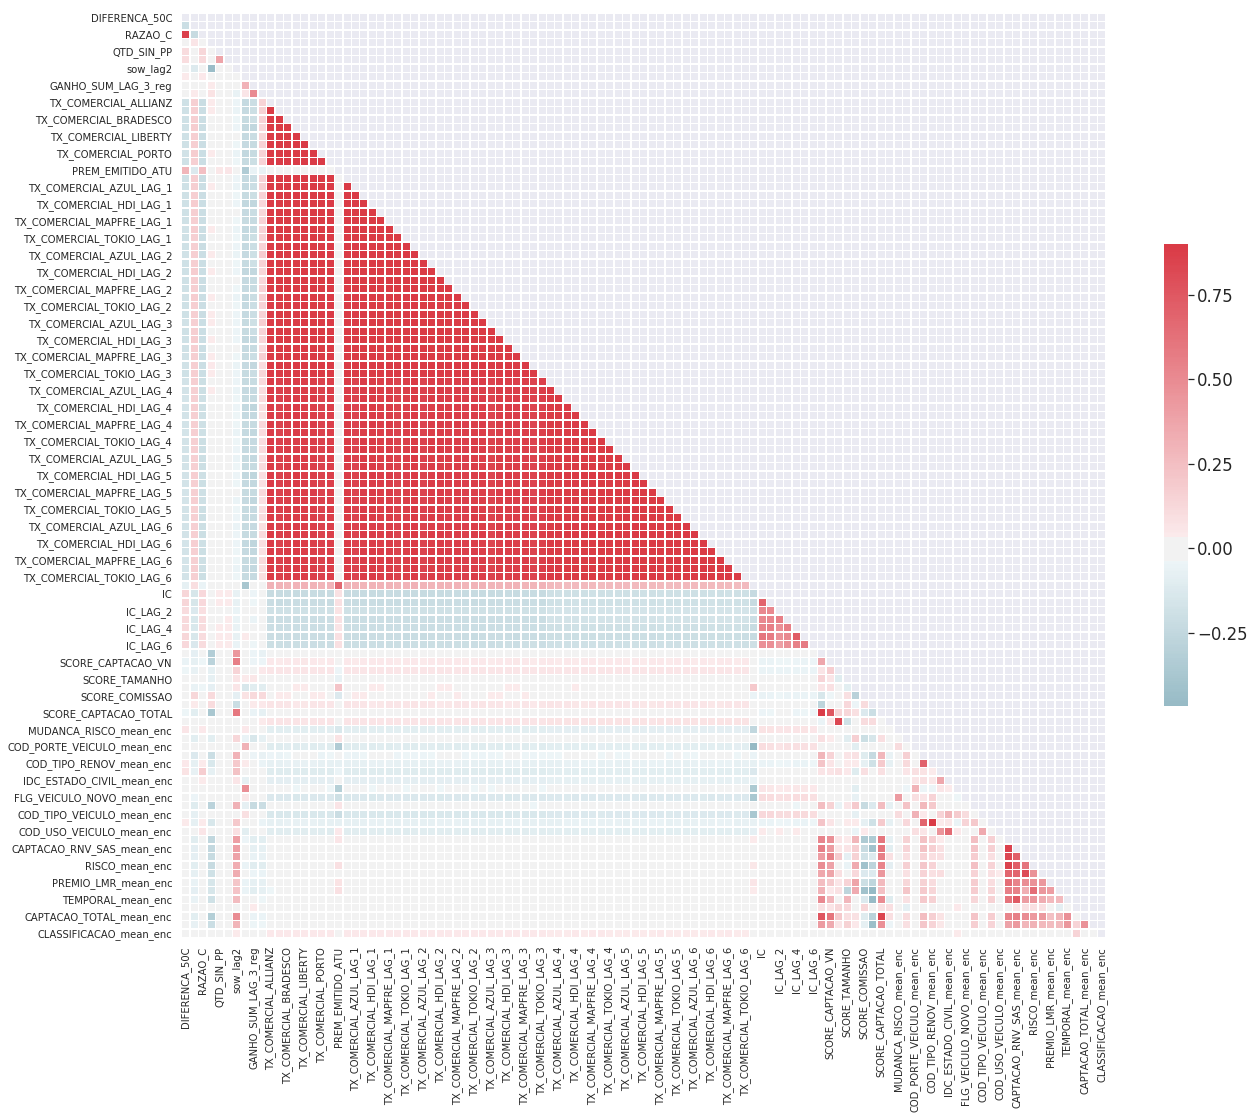

In [114]:
corr = feature_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 17))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()
# plt.savefig('corr', bbox_inches ='tight', pad_inches = 0 )

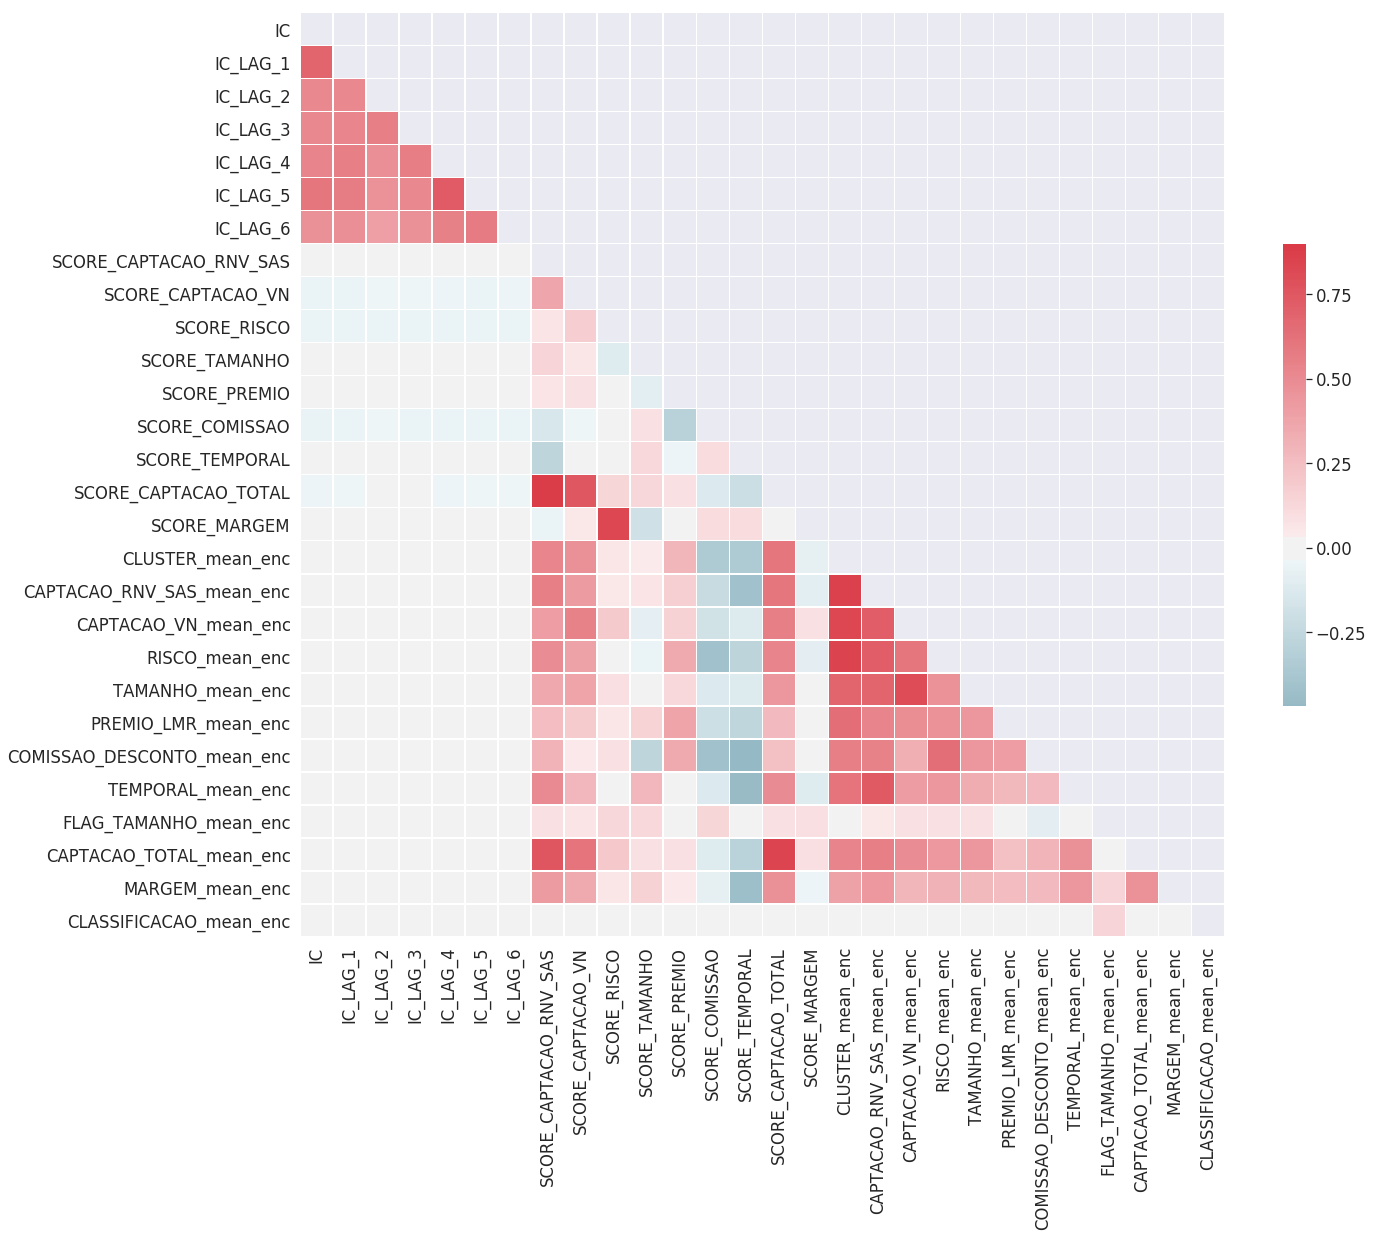

In [115]:
corr = feature_df[new_vars].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 17))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# plt.savefig('corr2', bbox_inches ='tight', pad_inches = 0 )

### Correlation Analysis - Categorical

#### Top pares de variáveis mais correlacionadas

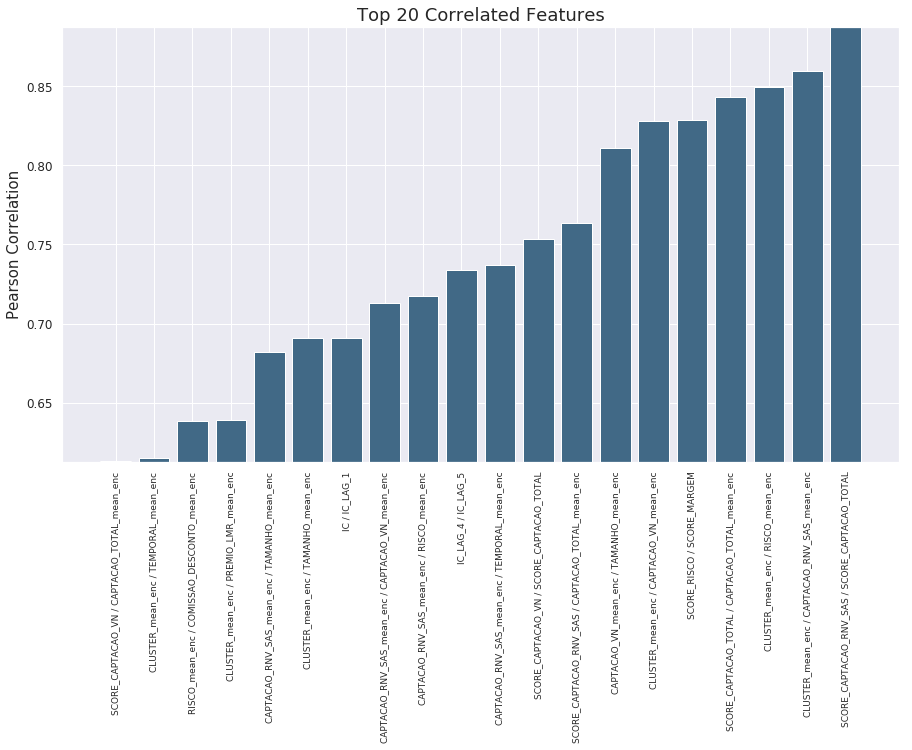

In [116]:
k = 20
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop, errors  = 'ignore' ).sort_values(ascending=False)
    return au_corr[0:n]

top = get_top_abs_correlations(feature_df[new_vars].copy(deep = True), k)
pairs = ["{0} / {1}".format(x[0], x[1]) for x in top.index]
values = [float(x) for x in top.values]

fig, ax = plt.subplots(figsize=(15,8))

def get_key(item):
    return item[0]

sorted_pair_corr = sorted(zip(values, pairs), key = get_key)

pos = np.arange(len(sorted_pair_corr)) + 0.5  
plt.bar(pos,  [x[0] for x in sorted_pair_corr], align='center', color = '#416986')
plt.ylim(np.min(top.values)*0.999, np.max(top.values))
plt.xticks(pos,  [x[1] for x in sorted_pair_corr], rotation = 90)
plt.ylabel('Pearson Correlation', size = 15)
plt.xticks(size = 9)
plt.yticks(size = 12)
plt.title('Top {0} Correlated Features'.format(k))
plt.show()

### PCA
Checar se poucas variáveis explicam a variância de todo o dataset


In [117]:
pca_vars =  new_vars
df_train = feature_df[pca_vars]

In [118]:
from sklearn.decomposition import PCA
n_comp = 20

pca = PCA(n_comp)
pca.fit(df_train.fillna(0.0))

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

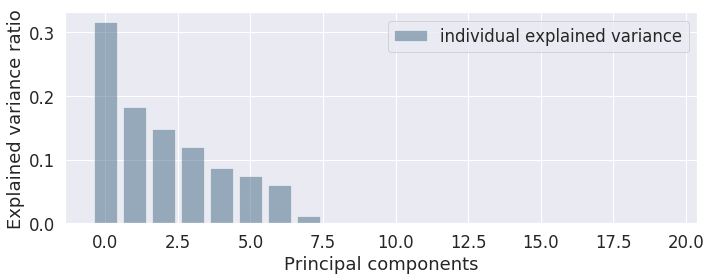

In [119]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 4))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', color = '#416986',
label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

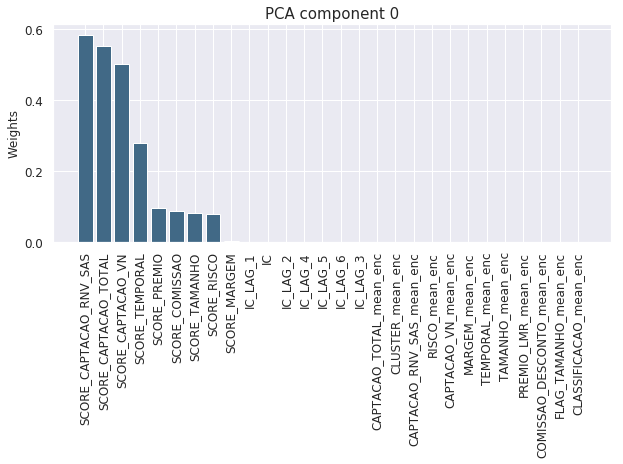

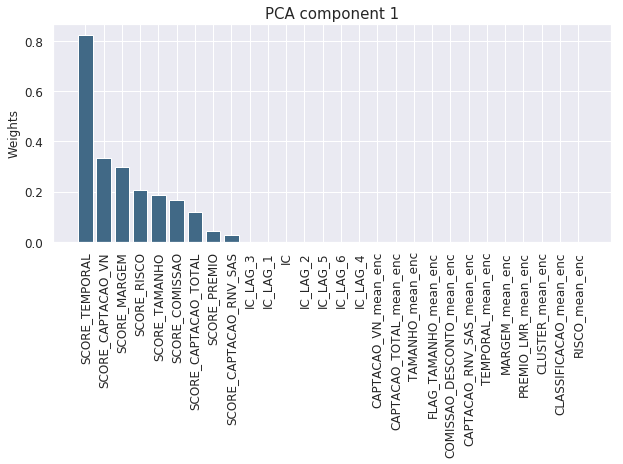

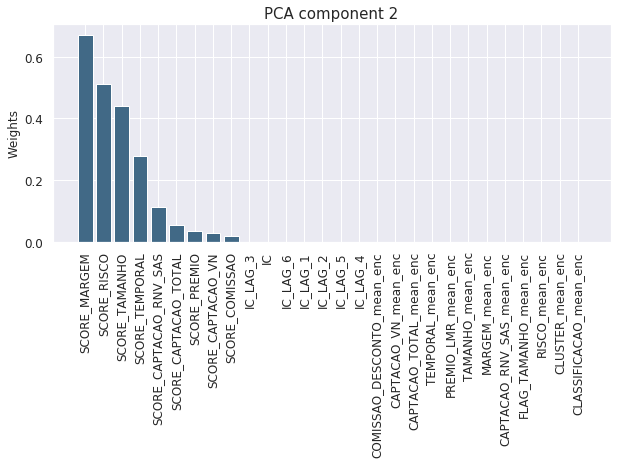

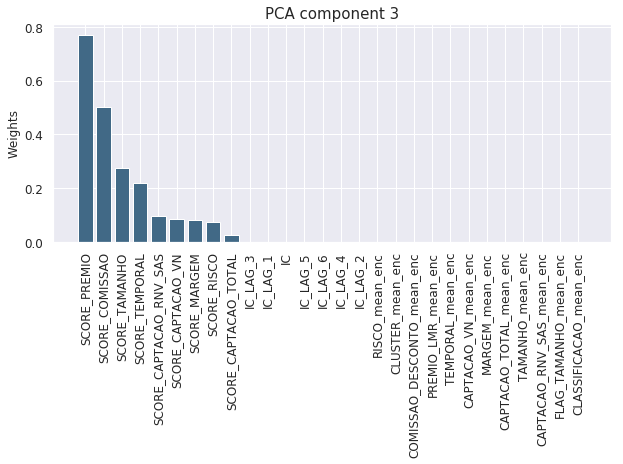

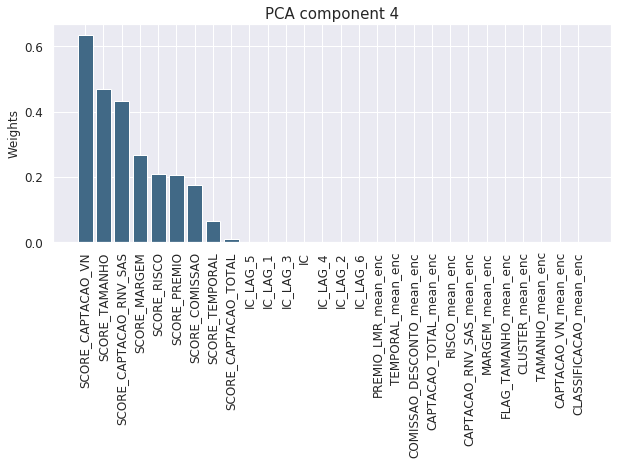

In [120]:
features = pd.DataFrame(pca.components_, columns = df_train.columns, index = np.arange(n_comp)).transpose().abs()
features['FEATURES'] = features.index
features = features.reset_index()

components_to_analyze = [0, 1, 2, 3, 4]
for c in components_to_analyze:
    features = features.sort_values(by = c, ascending = False)
    top = features.head(30)
    plt.figure(figsize=(10, 4))
    pos = np.arange(len(top)) + 0.5  
    
    plt.bar(pos, top[c], align='center', color = '#416986')
    plt.xticks(pos,  top['FEATURES'], rotation = 90)
    
    plt.ylabel('Weights'.format(c), size = 12)
    plt.title('PCA component {0}'.format(c), size = 15)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.show()

### Target plots (TO DO) 

In [46]:
df[new_vars].describe()

,GANHO_SUM_reg,PERDA_SUM_reg,GANHO_SUM_LAG_1_reg,PERDA_SUM_LAG_1_reg,GANHO_SUM_LAG_2_reg,PERDA_SUM_LAG_2_reg,GANHO_SUM_LAG_3_reg,PERDA_SUM_LAG_3_reg,GANHO_SUM_LAG_4_reg,PERDA_SUM_LAG_4_reg,...,TX_COMERCIAL_MAPFRE_LAG_6,TX_COMERCIAL_PORTO_LAG_6,TX_COMERCIAL_TOKIO_LAG_6,IC,IC_LAG_1,IC_LAG_2,IC_LAG_3,IC_LAG_4,IC_LAG_5,IC_LAG_6
count,1.468879e+06,1.468879e+06,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06,...,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06,1.468895e+06
mean,6.941007e-01,6.263469e-01,7.015248e-01,5.964156e-01,7.028216e-01,5.915499e-01,6.491639e-01,5.428276e-01,6.694453e-01,6.219425e-01,...,8.467629e-01,8.288109e-01,6.281247e-01,3.248515e+00,3.532085e+00,2.990154e+00,3.102071e+00,2.947823e+00,3.041549e+00,2.616126e+00
std,2.351789e-01,1.873300e-01,2.538476e-01,1.690156e-01,2.375054e-01,1.578011e-01,3.020025e-01,2.235756e-01,2.240112e-01,1.848813e-01,...,7.826284e-01,7.667774e-01,5.808531e-01,2.161624e+01,2.345226e+01,2.575110e+01,2.541321e+01,2.037246e+01,2.079303e+01,2.194317e+01
min,3.000000e-01,2.969231e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.010940e+02,-2.647779e+02,-7.170144e+02,-7.251828e+02,-3.010940e+02,-2.277648e+02,-3.779903e+02
25%,4.953846e-01,4.526923e-01,4.950000e-01,4.730769e-01,5.234615e-01,4.519231e-01,4.603846e-01,3.730769e-01,4.953846e-01,4.611538e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.582092e+00,-2.609958e+00,-2.492945e+00,-2.813888e+00,-1.671665e+00,-1.772892e+00,-1.678830e+00
50%,6.392308e-01,6.176923e-01,6.434615e-01,5.661538e-01,6.303846e-01,5.757692e-01,6.065385e-01,5.488462e-01,6.207692e-01,6.176923e-01,...,9.248179e-01,9.046853e-01,6.855776e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.365385e-01,7.311538e-01,8.303846e-01,6.938462e-01,8.626923e-01,6.719231e-01,8.207692e-01,6.846154e-01,8.315385e-01,7.115385e-01,...,1.427975e+00,1.396819e+00,1.059448e+00,4.792943e+00,4.869320e+00,4.309421e+00,4.365321e+00,3.451135e+00,3.533881e+00,3.255969e+00
max,1.341538e+00,1.195385e+00,1.469231e+00,1.223462e+00,1.486538e+00,1.040000e+00,1.550769e+00,1.062692e+00,1.260385e+00,1.195385e+00,...,5.723292e+01,5.432815e+01,4.357233e+01,1.553624e+03,2.357150e+03,4.360198e+03,2.160779e+03,2.543090e+03,1.978766e+03,2.336308e+03


## Feature Importance

Nas próximas seções, vamos avaliar o feature importance de diversas formas:

* Information Value
* Likelihood ratio test
* Random Forests

In [143]:
variable_ranking = {}

### Information Value

In [144]:
def calc_iv(df, feature, target, pr=False):

    d1 = df.groupby(by=feature, as_index=True)
    data = pd.DataFrame()

    data['all'] = d1[target].count()
    data['bad'] = d1[target].sum()
    data['share'] = data['all'] / data['all'].sum()
    data['bad_rate'] = d1[target].mean()
    data['d_g'] = (data['all'] - data['bad']) / (data['all'] - data['bad']).sum()
    data['d_b'] = data['bad'] / data['bad'].sum()
    data['woe'] = np.log(data['d_g'] / data['d_b'])
    data = data.replace({'woe': {np.inf: 0, -np.inf: 0}})
    data['iv'] = data['woe'] * (data['d_g'] - data['d_b'])

    data.insert(0, 'variable', feature)
    data.insert(1, 'value', data.index)
    data.index = range(len(data))

    iv = data['iv'].sum()

    if pr:
        print(data)
        print('IV = %s' % iv)

    return iv, data

In [145]:
ivs = []
for var in full_df.columns:
    iv, _ = calc_iv(full_df, var, 'QTD_PROP')
    ivs.append(iv)

def get_key(item):
    return item[0]
save = sorted(zip(ivs, full_df.columns), key = get_key)

/usr/local/lib/python3.5/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


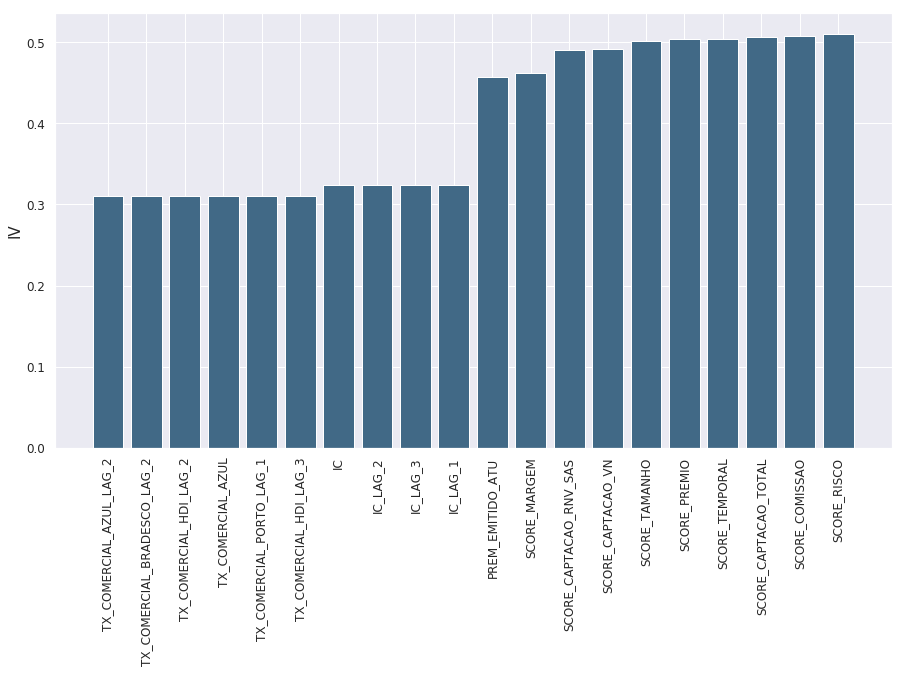

In [146]:
fig, ax = plt.subplots(figsize=(15,8))

pos = np.arange(len( save[-20:])) + 0.5  
plt.bar(pos, [x[0] for x in save[-20:]], align='center', color = '#416986')
plt.xticks(pos, [x[1] for x in save[-20:]], rotation = 90)
plt.ylabel('IV', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()
# plt.savefig('iv.png',  bbox_inches ='tight', pad_inches = 0)

In [147]:
i = 1 
variable_ranking = { }
for var in save[::-1]: 
    variable_ranking[var[1]] = []
    variable_ranking[var[1]].append(i)
    i = i + 1

### Likelihood Ratio Test - Ranking

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import scipy.stats as stat

def likelihood_ratio_test(features_alternate, labels, lr_model, features_null=pd.DataFrame([])):
    """
    Compute the likelihood ratio test for a model trained on the set of features in
    `features_alternate` vs a null model.  If `features_null` is not defined, then
    the null model simply uses the intercept (class probabilities).  Note that
    `features_null` must be a subset of `features_alternative` -- it can not contain
    features that are not in `features_alternate`.

    Returns the p-value, which can be used to accept or reject the null hypothesis.
    """
    labels = np.array(labels)
    features_alternate = np.array(features_alternate)

    if not features_null.empty:
        features_null = np.array(features_null)

        if features_null.shape[1] >= features_alternate.shape[1]:
            raise ValueError

        lr_model.fit(features_null, labels)
        null_prob = lr_model.predict_proba(features_null)[:, 1]
        df = features_alternate.shape[1] - features_null.shape[1]
    else:
        null_prob = sum(labels) / float(labels.shape[0]) * \
                    np.ones(labels.shape)
        df = features_alternate.shape[1]

    lr_model.fit(features_alternate, labels)
    alt_prob = lr_model.predict_proba(features_alternate)

    alt_log_likelihood = -log_loss(labels,
                                   alt_prob,
                                   normalize=False)
    null_log_likelihood = -log_loss(labels,
                                    null_prob,
                                    normalize=False)

    G = 2 * (alt_log_likelihood - null_log_likelihood)
    p_value = stat.chi2.sf(G, df)

    return G,p_value


def order_variable_importance(df, features, target):
    """
    Recebe um dataframe e variáveis alvo. Calcula o likelihood-test-ratio individual para todos
    usando um classificador logistico do scikit-learn. Retorna uma lista de variáveis ordenadas
    por deviance    
    """
    num_buckets = 400
    res = []
    for feat in features:
        X = pd.get_dummies(df[feat],prefix='feat')
        y = df[target]
        clf = LogisticRegression(random_state=0, solver='liblinear',max_iter =10000, warm_start =True)
        G, p_value = likelihood_ratio_test(X, y, clf)
        res.append([feat,G])


    return sorted(res, key=lambda x: -x[1])


In [149]:
var_importance = order_variable_importance(full_df.sample(frac = 0.01), all_features, 'QTD_PROP')

In [150]:
ordered_vars = [x[0] for x in var_importance]
importances = [x[1] for x in var_importance]
importances = (importances - np.min(importances)) / (np.max(importances) - np.min(importances))

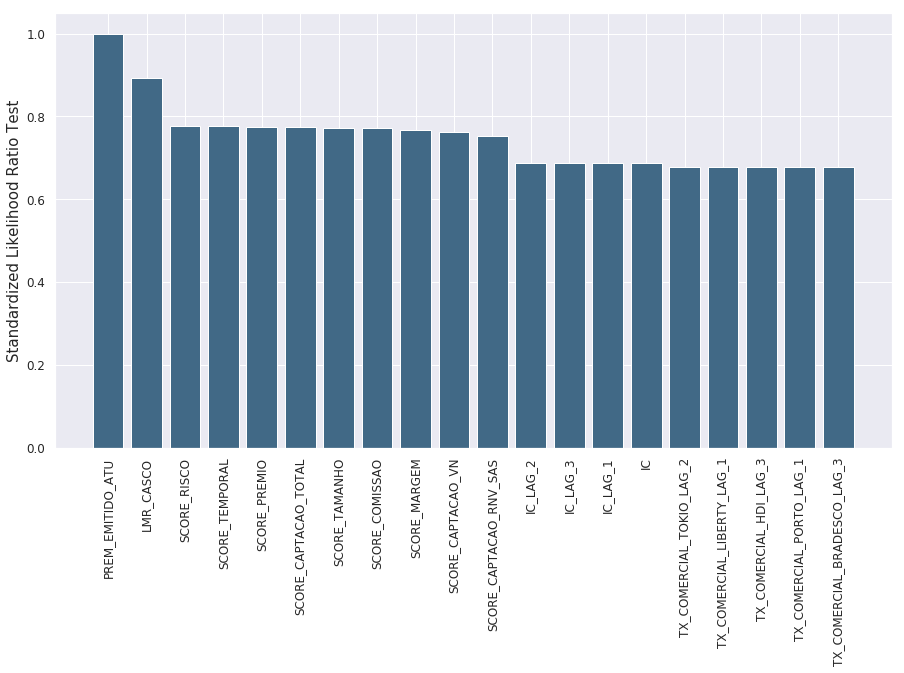

In [151]:
fig, ax = plt.subplots(figsize=(15,8))
pos = np.arange(len(importances[:20])) + 0.5  

plt.bar(pos, importances[:20], align = 'center', color = '#416986')
a = plt.xticks(pos, ordered_vars[:20], rotation = 90)
plt.ylabel('Standardized Likelihood Ratio Test', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

In [152]:
i = 1 
for var in ordered_vars: 
    variable_ranking[var].append(i)
    i = i + 1

### Random Forest Feature Selection

In [153]:
from feature_selector import FeatureSelector
x = full_df.sample(frac = 0.2)
y = x.pop('QTD_PROP')

fs = FeatureSelector(data = x, labels = y)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.80, 
                                        'task': 'classification', 'eval_metric': 'auc', 
                                        'cumulative_importance': 0.99}) 

0 features with greater than 0.60 missing values.

0 features with a single unique value.



/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


64 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[859]	valid_0's auc: 0.772531
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[885]	valid_0's auc: 0.765217
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[900]	valid_0's auc: 0.766738
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[982]	valid_0's auc: 0.763708
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[986]	valid_0's auc: 0.772413
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[995]	valid_0's auc: 0.769678
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best i

In [154]:
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)    
kept_feat = list(train_removed_all_once.columns)

['missing', 'low_importance', 'collinear', 'zero_importance', 'single_unique'] methods have been run

Removed 65 features.


In [155]:
kept_feat_importance = fs.feature_importances[fs.feature_importances['feature'].isin(kept_feat)]

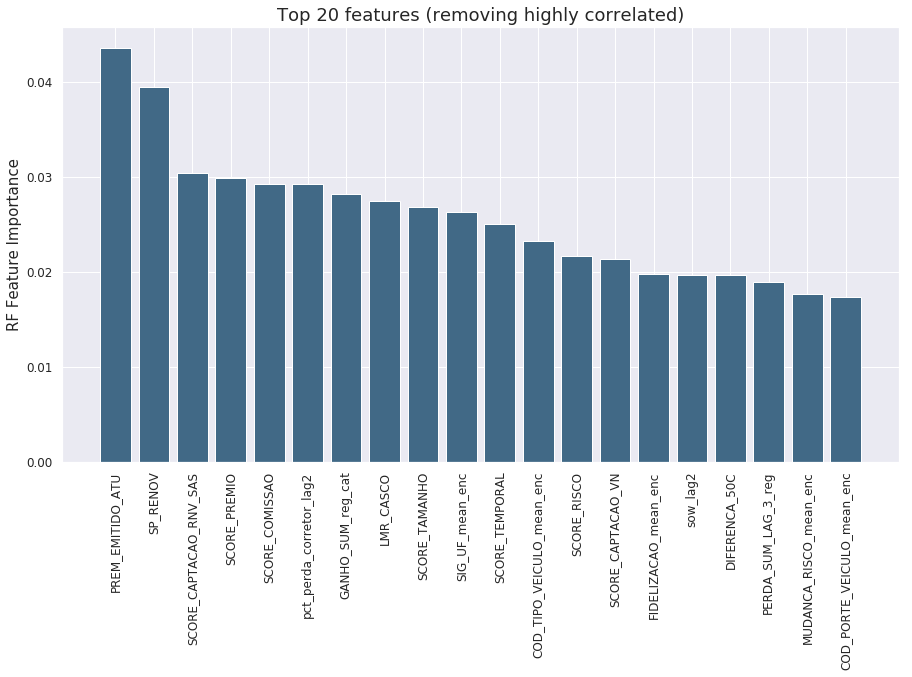

In [156]:
fig, ax = plt.subplots(figsize=(15,8))

top20 = kept_feat_importance.head(20)
plt.bar(top20['feature'], top20['normalized_importance'], color = '#416986')
a = plt.xticks(rotation = 90)
plt.ylabel('RF Feature Importance', size = 15)
_ = plt.xticks(size = 12)
_ = plt.yticks(size = 12)
plt.title('Top 20 features (removing highly correlated)')
plt.show()

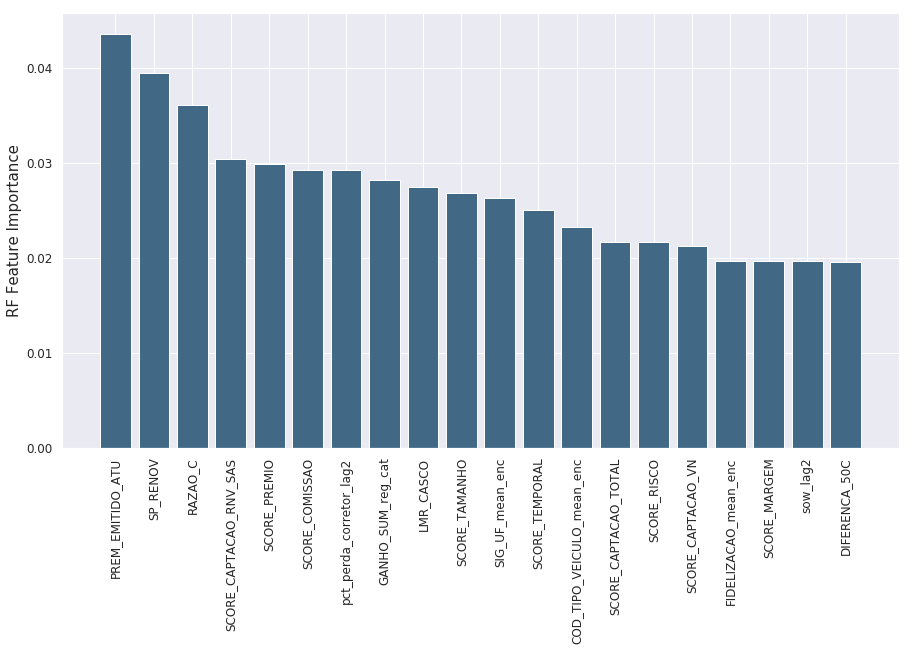

In [157]:
fig, ax = plt.subplots(figsize=(15,8))

top20 = fs.feature_importances.head(20)
plt.bar(top20['feature'], top20['normalized_importance'], color = '#416986')
a = plt.xticks(rotation = 90)
plt.ylabel('RF Feature Importance', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

In [158]:
i = 1 
for var in fs.feature_importances['feature'].values.ravel(): 
    variable_ranking[var].append(i)
    i = i + 1

### Feature Ranking

Ranking das features considerando os testes acima

In [159]:
ranking = pd.DataFrame([variable_ranking])

df_dict = {}
rk_vars =  []
rks = []

for var, rankings in variable_ranking.items():
     for rk in rankings:
            rk_vars.append(var)
            rks.append(rk)
            
df_dict['Feature'] = rk_vars
df_dict['Ranking'] = rks


ranking = pd.DataFrame(df_dict)

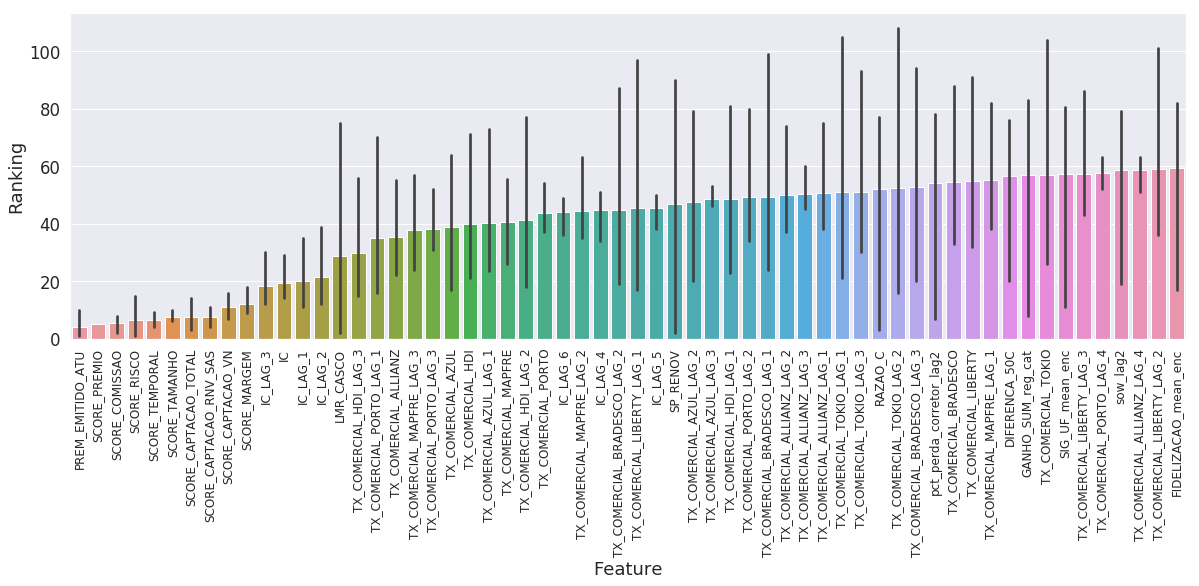

In [160]:
f, ax = plt.subplots(figsize=(20, 6))
med = pd.DataFrame([])
g = ranking.groupby('Feature')
med['median_rank'] = g['Ranking'].mean()
med = med.reset_index()
med = med.sort_values(by = 'median_rank')

g_ranking = pd.merge(left = ranking, right = med.head(60), on = 'Feature', how = 'right')
g_ranking = g_ranking.sort_values(by = 'median_rank')

sns.barplot('Feature', 'Ranking', data = g_ranking, ax = ax)
_ = plt.xticks(size = 12, rotation = 90)
plt.show()

In [163]:
med.head(20)['Feature'].values.ravel()

array(['PREM_EMITIDO_ATU', 'SCORE_PREMIO', 'SCORE_COMISSAO',
       'SCORE_RISCO', 'SCORE_TEMPORAL', 'SCORE_CAPTACAO_RNV_SAS',
       'SCORE_CAPTACAO_TOTAL', 'SCORE_TAMANHO', 'SCORE_CAPTACAO_VN',
       'SCORE_MARGEM', 'IC_LAG_3', 'IC', 'IC_LAG_1', 'IC_LAG_2',
       'LMR_CASCO', 'TX_COMERCIAL_HDI_LAG_3', 'TX_COMERCIAL_PORTO_LAG_1',
       'TX_COMERCIAL_ALLIANZ', 'TX_COMERCIAL_MAPFRE_LAG_3',
       'TX_COMERCIAL_PORTO_LAG_3'], dtype=object)

## Feature Groups

Vou analisar a distribuição das variáveis (antigas e novas) em categorias de negóico

#### Categorias

In [35]:
features_desc = pd.read_csv('features_desc.csv', sep = ';', decimal = ',')
features_desc['type'] = ['original'] * len(features_desc)

In [ ]:
new_vars = ['GANHO_SUM_reg',
'PERDA_SUM_reg',
'GANHO_SUM_LAG_1_reg',
'PERDA_SUM_LAG_1_reg',
'GANHO_SUM_LAG_2_reg',
'PERDA_SUM_LAG_2_reg',
'GANHO_SUM_LAG_3_reg',
'PERDA_SUM_LAG_3_reg',
'GANHO_SUM_LAG_4_reg',
'PERDA_SUM_LAG_4_reg',
'GANHO_SUM_LAG_5_reg',
'PERDA_SUM_LAG_5_reg',
'GANHO_SUM_LAG_6_reg',
'PERDA_SUM_LAG_6_reg',
'GANHO_SUM_reg_cat',
'PERDA_SUM_reg_cat',
'GANHO_SUM_LAG_1_reg_cat',
'PERDA_SUM_LAG_1_reg_cat',
'GANHO_SUM_LAG_2_reg_cat',
'PERDA_SUM_LAG_2_reg_cat',
'GANHO_SUM_LAG_3_reg_cat',
'PERDA_SUM_LAG_3_reg_cat',
'GANHO_SUM_LAG_4_reg_cat',
'PERDA_SUM_LAG_4_reg_cat',
'GANHO_SUM_LAG_5_reg_cat',
'PERDA_SUM_LAG_5_reg_cat',
'GANHO_SUM_LAG_6_reg_cat',
'PERDA_SUM_LAG_6_reg_cat',
'SCORE_CSPA',
'RENDA_CRP7',
'VlComprometimentoTot',]


new_vars_category = ['Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Cliente',
'Cliente',
'Cliente']


new_vars_subcategory =['Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Perda/Ganho',
'Cliente Perfil',
'Cliente Perfil',
'Cliente Perfil']
new_cat = pd.DataFrame({'FEATURES' : new_vars, 'CATEGORIA' : new_vars_category , 'SUBCATEGORIA' : new_vars_subcategory})
new_cat['type'] = ['new'] * len(new_cat)


In [ ]:
features_desc = features_desc.append(new_cat, ignore_index = True)


In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot('CATEGORIA', hue = 'type', data = features_desc, order = features_desc['CATEGORIA'].value_counts().index)
plt.xlabel('')
plt.show()

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot('SUBCATEGORIA', hue = 'type', data =features_desc, order = features_desc['SUBCATEGORIA'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('')
plt.show()

### Feature Agglomeration 

In [16]:
from sklearn.cluster import FeatureAgglomeration
from FeatureEngineering.PrepareDS_xgb import PrepareDSXgb

In [ ]:
# fe = PrepareDSXgb(small_categorical = small_categorical, large_categorical = large_categorical, variable_set = all_features)
# datasets = fe.prepare('gs://marketprice/renov/bain/sp4/new_df3a.csv','gs://marketprice/renov/bain/sp4/new_df3a.csv', 'gs://marketprice/renov/bain/sp4/new_df3a.csv', 'gs://marketprice/renov/bain/sp4/new_df3a.csv')

In [17]:
cluster_vars = new_vars

In [18]:
# df_train = datasets['train']
# df_train2 = df_train.copy(deep = True)
# df_train2.pop('QTD_PROP')
# df_train2 = df_train2.fillna(df_train2.mean())

df_train = feature_df[cluster_vars]

In [22]:
fag = FeatureAgglomeration(n_clusters = 30, linkage = 'complete')
fag_results = fag.fit(df_train.fillna(0))

In [23]:
clusters = {'groups' : fag_results.labels_, 'features' : cluster_vars}
feature_clusters = pd.DataFrame(clusters)

In [24]:
feature_clusters.sort_values(by = 'groups')

,features,groups
40,TX_COMERCIAL_PORTO_LAG_1,0
28,TX_COMERCIAL_BRADESCO,0
29,TX_COMERCIAL_HDI,0
30,TX_COMERCIAL_LIBERTY,0
31,TX_COMERCIAL_MAPFRE,0
32,TX_COMERCIAL_PORTO,0
33,TX_COMERCIAL_TOKIO,0
34,TX_COMERCIAL_ALLIANZ_LAG_1,0
35,TX_COMERCIAL_AZUL_LAG_1,0
36,TX_COMERCIAL_BRADESCO_LAG_1,0


### Agrupamentos 

Os agrupamentos para as features de mercado foram feitos conforme lag. A hipótese é testar as variáveis por congênere de uma única vez

In [ ]:
['TX_COMERCIAL_ALLIANZ',
'TX_COMERCIAL_AZUL',
'TX_COMERCIAL_BRADESCO',
'TX_COMERCIAL_HDI',
'TX_COMERCIAL_LIBERTY',
'TX_COMERCIAL_MAPFRE',
'TX_COMERCIAL_PORTO',
'TX_COMERCIAL_TOKIO',]
['TX_COMERCIAL_ALLIANZ_LAG_1',
'TX_COMERCIAL_AZUL_LAG_1',
'TX_COMERCIAL_BRADESCO_LAG_1',
'TX_COMERCIAL_HDI_LAG_1',
'TX_COMERCIAL_LIBERTY_LAG_1',
'TX_COMERCIAL_MAPFRE_LAG_1',
'TX_COMERCIAL_PORTO_LAG_1',
'TX_COMERCIAL_TOKIO_LAG_1',]
['TX_COMERCIAL_ALLIANZ_LAG_2',
'TX_COMERCIAL_AZUL_LAG_2',
'TX_COMERCIAL_BRADESCO_LAG_2',
'TX_COMERCIAL_HDI_LAG_2',
'TX_COMERCIAL_LIBERTY_LAG_2',
'TX_COMERCIAL_MAPFRE_LAG_2',
'TX_COMERCIAL_PORTO_LAG_2',
'TX_COMERCIAL_TOKIO_LAG_2',]
['TX_COMERCIAL_ALLIANZ_LAG_3',
'TX_COMERCIAL_AZUL_LAG_3',
'TX_COMERCIAL_BRADESCO_LAG_3',
'TX_COMERCIAL_HDI_LAG_3',
'TX_COMERCIAL_LIBERTY_LAG_3',
'TX_COMERCIAL_MAPFRE_LAG_3',
'TX_COMERCIAL_PORTO_LAG_3',
'TX_COMERCIAL_TOKIO_LAG_3',]
['TX_COMERCIAL_ALLIANZ_LAG_4',
'TX_COMERCIAL_AZUL_LAG_4',
'TX_COMERCIAL_BRADESCO_LAG_4',
'TX_COMERCIAL_HDI_LAG_4',
'TX_COMERCIAL_LIBERTY_LAG_4',
'TX_COMERCIAL_MAPFRE_LAG_4',
'TX_COMERCIAL_PORTO_LAG_4',
'TX_COMERCIAL_TOKIO_LAG_4',]
['TX_COMERCIAL_ALLIANZ_LAG_5',
'TX_COMERCIAL_AZUL_LAG_5',
'TX_COMERCIAL_BRADESCO_LAG_5',
'TX_COMERCIAL_HDI_LAG_5',
'TX_COMERCIAL_LIBERTY_LAG_5',
'TX_COMERCIAL_MAPFRE_LAG_5',
'TX_COMERCIAL_PORTO_LAG_5',
'TX_COMERCIAL_TOKIO_LAG_5',]
['TX_COMERCIAL_ALLIANZ_LAG_6',
'TX_COMERCIAL_AZUL_LAG_6',
'TX_COMERCIAL_BRADESCO_LAG_6',
'TX_COMERCIAL_HDI_LAG_6',
'TX_COMERCIAL_LIBERTY_LAG_6',
'TX_COMERCIAL_MAPFRE_LAG_6',
'TX_COMERCIAL_PORTO_LAG_6',
'TX_COMERCIAL_TOKIO_LAG_6',]

In [131]:
feature_clusters.to_csv('features_desc_group5.csv', index = False)